<a href="https://colab.research.google.com/github/Imad-BOUZGOU/PRNetlogo/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importer les données

In [58]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [59]:
b.shape, A.shape


((10000,), (10000, 2))

# Estimation des moindres carrés

L'estimation des moindres carrés est l'un des algorithmes fondamentaux de l'apprentissage statisque. Etant données une matrice $A$ de taille $ n \times d $ et un vecteur $b$ de taille $ n \times 1$, l'objectif est de trouver un vecteur $x \in \mathbb{R}^d$ minimisant la fonction $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

Dans cet exercice, nous allons chercher $x$ en utilisant l'estimation des moindres carrées.

Prouver que la fonction $f$ est $L$-lisse avec $L = \frac1n\|A\|_{s}^2$ où la norme spectrale $\|A\|_s := \max_{\|v\| = 1} \|Av\|$.

Pour la suite, vous pouvez supposer que la fonction $f$ est $L$-lisse.

# Calcul de la fonction objective
La méthode `calculate_mse` donnée ici calcule l'erreur quadratique moyenne d'un vecteur `e`.

In [60]:
def calculate_mse(e):
    """Calculer l'erreur quadratique moyenne du vecteur e."""
    return 1/2*np.mean(e**2)

# Descente de gradient

Compéléter la méthode `compute_gradient` suivante:

In [61]:
def compute_gradient(b, A, x):
    
    """Compute the gradient."""

    n = len(b)
    
    grad= 1/n *A.T.dot(A.dot(x)  - b)
    
    
    err= calculate_mse(A.dot(x) - b)
    print(err)
    
    
    return grad, err

Compléter la méthode `gradient_descent` suivante:

In [62]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Définier les parametres pour stocker x et les valeurs de la fonction objective.
    xs=[]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERER VOTRE CODE
        # TODO: calculer le gradient et la fonction objective
        # ***************************************************
        grad,obj = compute_gradient(b, A, x)
        # ***************************************************
        # INSERER VOTRE CODE
        # TODO: mettre à jour x par descente du gradient
        # ***************************************************
        x= x - gamma * grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Tester votre méthode descente de grandient avec les pas naifs par un code demo suivant. 

In [63]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

2792.2367127591674
Gradient Descent(0/49): objective=2792.2367127591674
2264.6350560300025
Gradient Descent(1/49): objective=2264.6350560300025
1837.27771407938
Gradient Descent(2/49): objective=1837.27771407938
1491.1182670993753
Gradient Descent(3/49): objective=1491.1182670993753
1210.729115045571
Gradient Descent(4/49): objective=1210.729115045571
983.6139018819902
Gradient Descent(5/49): objective=983.6139018819902
799.6505792194896
Gradient Descent(6/49): objective=799.6505792194896
650.6402878628644
Gradient Descent(7/49): objective=650.6402878628644
529.9419518639978
Gradient Descent(8/49): objective=529.9419518639978
432.1762997049158
Gradient Descent(9/49): objective=432.1762997049158
352.9861214560594
Gradient Descent(10/49): objective=352.9861214560594
288.84207707448564
Gradient Descent(11/49): objective=288.84207707448564
236.88540112541085
Gradient Descent(12/49): objective=236.88540112541085
194.8004936066604
Gradient Descent(13/49): objective=194.8004936066604
160.7117

Visualisation

In [64]:
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

# Descente de gradient avec meilleure convergence 
Nous allons utliser faire des modifications en exploitant la propriété lisse de la fonction. On calcule d'abord le paramètre L puis mettre à jour l'algorithm descente de gradient.

## Calcul $L$

Pour calculer la norme (spectrale) de $A$, vous pouvez utiliser np.linalg.norm(A, 2)

In [65]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # INSERER VOTRE CODE
    # TODO: calculer ||A.T*A||
    # ***************************************************
    c= np.linalg.norm(A.T.dot(A), 2)
    # ***************************************************
    # INSERER VOTRE CODE
    # TODO: calculer L = paramètre de lissage de f
    # ***************************************************
    L= 1/len(b) * c

    return L

## Meilleur algorithme descente de gradient
Implémenter l'algorithme descente de gradient avec une meilleur convergence. 

In [66]:
# Définir les paramètres 
max_iters = 50

# ***************************************************
# INSERER VOTRE CODE
# TODO: meilleur descente du gradient 
# ***************************************************
gamma = 1/calculate_L(b, A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

2792.2367127591674
Gradient Descent(0/49): objective=2792.2367127591674
15.3858878688294
Gradient Descent(1/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(2/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(3/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(4/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(5/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(6/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(7/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(8/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(9/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(10/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(11/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(12/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(13/49): objective=15.3858878688294
15.3858878688294
Gradient Descent(14/49)

In [67]:
1/calculate_L(b, A)

0.9999999999999984

Visualisation

In [68]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

# Importer les données plus complexe 
La source des données est  https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [69]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [70]:
b.shape, A.shape

((1030,), (1030, 8))

# Exécution Descente de gradient 

## Descente de gradient avec lissage 
Compléter le code en utilisant la lissage de la fonction

In [73]:
max_iters = 50


# ***************************************************
# INSERER VOTRE CODE
# TODO: un meilleur pas 
# ***************************************************
gamma = 1/calculate_L(b, A)


# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

780.8686016504854
Gradient Descent(0/49): objective=780.8686016504854
721.5052560260676
Gradient Descent(1/49): objective=721.5052560260676
706.7843584315374
Gradient Descent(2/49): objective=706.7843584315374
702.1659603718193
Gradient Descent(3/49): objective=702.1659603718193
700.3195706210597
Gradient Descent(4/49): objective=700.3195706210597
699.3927282552014
Gradient Descent(5/49): objective=699.3927282552014
698.8265138747603
Gradient Descent(6/49): objective=698.8265138747603
698.4252460378514
Gradient Descent(7/49): objective=698.4252460378514
698.1121802865196
Gradient Descent(8/49): objective=698.1121802865196
697.8540419775695
Gradient Descent(9/49): objective=697.8540419775695
697.6346924802035
Gradient Descent(10/49): objective=697.6346924802035
697.4451956987403
Gradient Descent(11/49): objective=697.4451956987403
697.2798771098778
Gradient Descent(12/49): objective=697.2798771098778
697.134694345026
Gradient Descent(13/49): objective=697.134694345026
697.0065306304226


## L'évolution de la fonction objective

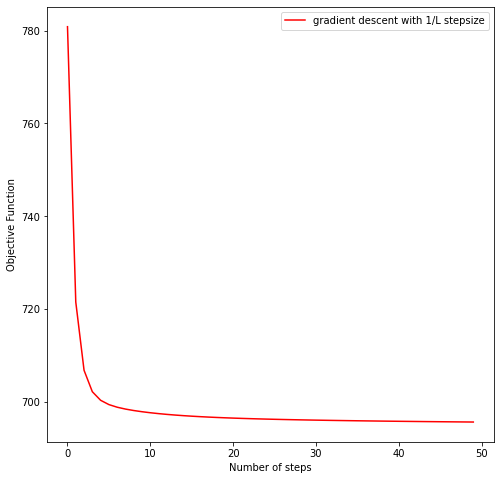

In [75]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.legend(loc='upper right')
plt.show()